# ***Projet 09 - Etude de marché - Préparation des données - FIRST RUN***


---
## Partie 1 - Préparation

### 1. Import des librairies (ok)
---

In [1]:
# Mes imports de lib de base
import pandas as pd # Pour travail avec les df
import numpy as np # Tout ce qui est fct math avec numpy, tjs utile

# Pour les graphiques
import matplotlib.pyplot as plt # Graphes avec matplotlib
import seaborn as sns # Graphes avec seaborn
sns.set_style('darkgrid', {'grid.color': '.5', 'grid.linestyle': ':'}) # Défini un fond de graphe que ce soit pour sns ou plt

# Pour les stats et autre
import scipy.stats as stats # Pour des stats avec scipy
import statsmodels.api as sm # Pour des régressions linéaires ou autre

# Pour le clustering et PCA
import sklearn as sk
import scipy as sp
# import pca as pca
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans # Clustering avec KMeans

from sklearn.decomposition import PCA # Pour calcul des composantes principales
from matplotlib.collections import LineCollection # Pour les graph liés à la PCA

### 2. Infos sur les fichiers (df) - Préparation
---

#### *2.1. Disponibilité*

In [2]:
# On prendra les données de ce df comme base à laquelle on ajoutera d'autres données

In [3]:
# Import du csv dispo alimentaire par pays en 2017
# On part du principe que ces datas sont 'safe' (source : FAO) et qu'il n'y a pas de doublons dans les données, ce qui nous éviteras de les tester
data_dispo_alim = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
data_dispo_alim

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


In [4]:
# Taille du dataset
data_dispo_alim.shape

(176600, 14)

In [5]:
# Infos sur le dataset
# On voit qu'il n'y à pas de manquants
print('Infos sur le dataset :')
print(data_dispo_alim.info())
print('')
print('Manquants sur le dataset :')
print(data_dispo_alim.isna().sum())

Infos sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dt

In [6]:
# Describe sur le dataset
# Ce dataset est sur l'année 2017, donc à voir avec les autres data comment les caler
# Note : On a 174 pays
data_dispo_alim.describe(include = 'all')

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
count,176600,176600,176600.000000,176600,176600.000000,176600,176600.000000,176600,176600.0,176600.0,176600,176600.000000,176600,176600
unique,1,1,NaN,174,NaN,17,NaN,98,NaN,NaN,4,NaN,2,2
top,FBS,Nouveaux Bilans Alimentaire,NaN,Tchad,NaN,Disponibilité intérieure,NaN,Maïs et produits,NaN,NaN,Milliers de tonnes,NaN,S,Données standardisées
freq,176600,176600,NaN,1416,NaN,15905,NaN,2593,NaN,NaN,118487,NaN,118487,118487
mean,NaN,NaN,125.474740,NaN,3810.052894,NaN,2628.778545,NaN,2017.0,2017.0,NaN,210.554918,NaN,NaN
std,NaN,NaN,72.941699,NaN,2211.790089,NaN,91.993247,NaN,0.0,0.0,NaN,4762.047787,NaN,NaN
min,NaN,NaN,1.000000,NaN,645.000000,NaN,2511.000000,NaN,2017.0,2017.0,NaN,-10388.000000,NaN,NaN
25%,NaN,NaN,63.000000,NaN,684.000000,NaN,2556.000000,NaN,2017.0,2017.0,NaN,0.000000,NaN,NaN
50%,NaN,NaN,120.000000,NaN,5142.000000,NaN,2612.000000,NaN,2017.0,2017.0,NaN,0.120000,NaN,NaN
75%,NaN,NaN,188.000000,NaN,5301.000000,NaN,2732.000000,NaN,2017.0,2017.0,NaN,8.462500,NaN,NaN


In [7]:
# Mapping des colonnes
# On récupère l'entête sous forme de liste
col_df = list(data_dispo_alim.columns)
# On défini les valeurs de remplacement (sera identique pour le df population)
col_replace = ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
# En premier les éléments à remplacer, en second la valeur de remplacement
replace_dict = dict(zip(col_df, col_replace)) # Mise des données sous  forme de dico
print(replace_dict)
# On passe le dico créé dans le rename
data_dispo_alim = data_dispo_alim.rename(columns = replace_dict)
data_dispo_alim.head()

{'Code Domaine': 'domain_code', 'Domaine': 'domaine', 'Code zone': 'zone_code', 'Zone': 'zone', 'Code Élément': 'item_code', 'Élément': 'item', 'Code Produit': 'product_code', 'Produit': 'product', 'Code année': 'year_code', 'Année': 'year', 'Unité': 'unity', 'Valeur': 'value', 'Symbole': 'symbole', 'Description du Symbole': 'symbole_descr'}


,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [8]:
# Nombre de pays présents dans le df_dispo
len(data_dispo_alim['zone'].unique())

174

##### Calcul des totaux par pays

In [9]:
# Equation du P4 pour vérif certaines choses au niveau de la dipo alim

# Production + Importation - Exportation + Variation
# = Dispo =
# Aliments animaux + Autres utilisations + Nourriture + Pertes + Semence + Traitement


In [10]:
# # Calcul et ajout de la dispo kCal globale par pays, on prend le global de tous les produits
# # On prend uniquementles lignes de dispo alim en kCal
# temp_alim_tot = data_dispo_alim.loc[data_dispo_alim['item'] == 'Disponibilité alimentaire (Kcal/personne/jour)']
# temp_alim_tot

# # On sum la  dispo kCal par pays pour avoir les kCal par pays de dispo
# temp_alim_tot_gb_country = temp_alim_tot.groupby(['zone']).agg({'value' : 'sum'}).reset_index()
# temp_alim_tot_gb_country

# # Test si ça matche, non on concat au fur et à mesure pour ajouter nos items à chaque fois
# # On ajoute la dispo totale calculé à la suite du df de base et on remplace l'item par ce qu'il est, on ne touche pas aux autres colonnes pour pouvoir concat avec la population
# # Sur les lignes rajoutées qui on un NaN, on indique des infos pour savoir la correspondance sur des colonnes (à affiner pour la suite)
# # Pour les Item et Unity on reprend la même trame que le df
# df_dispo_alim = pd.concat([data_dispo_alim, temp_alim_tot_gb_country]).fillna({'item' : 'Disponibilité alimentaire Totale (Kcal/personne/jour)', 'product' : 'Total_pays_kcal',
#                                                                                'unity' : 'Kcal/personne/jour', 'year' : 2017}).reset_index(drop = True).copy()
# df_dispo_alim

In [11]:
# # Calcul et ajout de la dispo intérieure globale par pays, on prend le global de tous les produits
# # On prend uniquementles lignes de dispo intérieure
# temp_dispo_tot = data_dispo_alim.loc[data_dispo_alim['item'] == 'Disponibilité intérieure']
# temp_dispo_tot

# # On sum la  dispo intérieure par pays pour avoir les dispos par pays de dispo
# temp_dispo_tot_gb_country = temp_dispo_tot.groupby(['zone']).agg({'value' : 'sum'}).reset_index()
# temp_dispo_tot_gb_country

# # Test si ça matche, non on concat au fur et à mesure pour ajouter nos items à chaque fois
# # On ajoute la dispo totale calculé à la suite du df de base et on remplace l'item par ce qu'il est, on ne touche pas aux autres colonnes pour pouvoir concat avec la population
# # Sur les lignes rajoutées qui on un NaN, on indique des infos pour savoir la correspondance sur des colonnes (à affiner pour la suite)
# # Pour les Item et Unity on reprend la même trame que le df
# df_dispo_alim = pd.concat([df_dispo_alim, temp_dispo_tot_gb_country]).fillna({'item' : 'Disponibilité intérieure totale', 'product' : 'Total_pays_Mtonnes',
#                                                                               'unity' : 'milliers_tonnes', 'year' : 2017}).reset_index(drop = True).copy()
# df_dispo_alim

In [12]:
# gb sur zone et item pour avoir la somme de chaque item par zone
temp_total = data_dispo_alim.groupby(['zone', 'item']).agg({'value' : 'sum'}).reset_index()
temp_total

,zone,item,value
0,Afghanistan,Aliments pour animaux,456.00
1,Afghanistan,Autres utilisations (non alimentaire),94.00
2,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),1997.00
3,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,357.31
4,Afghanistan,Disponibilité de matière grasse en quantité (g...,30.63
...,...,...,...
2834,Îles Salomon,Production,1059.00
2835,Îles Salomon,Résidus,-3.00
2836,Îles Salomon,Semences,0.00
2837,Îles Salomon,Traitement,309.00


In [13]:
# On rajoute les données calculées à la suite du df de base et on précise ce que c'est
df_dispo_alim = pd.concat([data_dispo_alim, temp_total]).fillna({ 'product' : 'Total', 'year' : 2017}).reset_index(drop = True)
df_dispo_alim

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
0,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5511.0,Production,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5611.0,Importations - Quantité,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5072.0,Variation de stock,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5911.0,Exportations - Quantité,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5301.0,Disponibilité intérieure,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,6701.0,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179434,NaN,NaN,NaN,Îles Salomon,NaN,Production,NaN,Total,NaN,2017.0,NaN,1059.0,NaN,NaN
179435,NaN,NaN,NaN,Îles Salomon,NaN,Résidus,NaN,Total,NaN,2017.0,NaN,-3.0,NaN,NaN
179436,NaN,NaN,NaN,Îles Salomon,NaN,Semences,NaN,Total,NaN,2017.0,NaN,0.0,NaN,NaN
179437,NaN,NaN,NaN,Îles Salomon,NaN,Traitement,NaN,Total,NaN,2017.0,NaN,309.0,NaN,NaN


##### *2.1.2. Nettoyage du dataset*

In [14]:
# On regarde les colonnes du df pour savoir ce que l'on drop
df_dispo_alim.columns.tolist()

['domain_code',
 'domaine',
 'zone_code',
 'zone',
 'item_code',
 'item',
 'product_code',
 'product',
 'year_code',
 'year',
 'unity',
 'value',
 'symbole',
 'symbole_descr']

In [15]:
# On regarde les différents éléments du dataset pour savoir ce que l'on veut calculer et reprendre les éléments pour les .loc
df_dispo_alim['item'].unique().tolist()


['Production',
 'Importations - Quantité',
 'Variation de stock',
 'Exportations - Quantité',
 'Disponibilité intérieure',
 'Aliments pour animaux',
 'Semences',
 'Pertes',
 'Résidus',
 'Nourriture',
 'Disponibilité alimentaire en quantité (kg/personne/an)',
 'Disponibilité alimentaire (Kcal/personne/jour)',
 'Disponibilité de protéines en quantité (g/personne/jour)',
 'Disponibilité de matière grasse en quantité (g/personne/jour)',
 'Traitement',
 'Autres utilisations (non alimentaire)',
 'Alimentation pour touristes']

In [16]:
df_dispo_alim.isna().sum()

domain_code      2839
domaine          2839
zone_code        2839
zone                0
item_code        2839
item                0
product_code     2839
product             0
year_code        2839
year                0
unity            2839
value               0
symbole          2839
symbole_descr    2839
dtype: int64

In [17]:
# On ne touche à rien, on prendra les données qui nous intéressent une fois toutes les données dans un seul df

#### *2.2. Population*

In [18]:
# Import csv population de 2000 à 2018
data_population = pd.read_csv('Population_2000_2018.csv')
data_population

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


In [19]:
# Info sur le dataset
data_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [20]:
# Recherche de manquants
# On voit qu'il y a bcp de manquants dans 'Note', on ne s'en occupe pas car cette colonne sera supprimée
data_population.isna().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

In [21]:
# Describe sur le dataset
# L'étendue des données va de 2000 à 2018
# Note : On a 238 pays
data_population.describe(include = 'all')

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,4411,4411,4411.000000,4411,4411.0,4411,4411.0,4411,4411.000000,4411.000000,4411,4.411000e+03,4411,4411,258
unique,1,1,NaN,238,NaN,1,NaN,1,NaN,NaN,1,NaN,2,2,1
top,OA,Séries temporelles annuelles,NaN,Afghanistan,NaN,Population totale,NaN,Population-Estimations,NaN,NaN,1000 personnes,NaN,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
freq,4411,4411,NaN,19,NaN,4411,NaN,4411,NaN,NaN,4411,NaN,4374,4374,258
mean,NaN,NaN,132.202902,NaN,511.0,NaN,3010.0,NaN,2009.068238,2009.068238,NaN,2.963004e+04,NaN,NaN,NaN
std,NaN,NaN,75.854840,NaN,0.0,NaN,0.0,NaN,5.481539,5.481539,NaN,1.238029e+05,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,511.0,NaN,3010.0,NaN,2000.000000,2000.000000,NaN,7.850000e-01,NaN,NaN,NaN
25%,NaN,NaN,68.000000,NaN,511.0,NaN,3010.0,NaN,2004.000000,2004.000000,NaN,3.921890e+02,NaN,NaN,NaN
50%,NaN,NaN,132.000000,NaN,511.0,NaN,3010.0,NaN,2009.000000,2009.000000,NaN,4.764741e+03,NaN,NaN,NaN
75%,NaN,NaN,195.000000,NaN,511.0,NaN,3010.0,NaN,2014.000000,2014.000000,NaN,1.821548e+04,NaN,NaN,NaN


In [22]:
# Mapping des colonnes
# On récupère l'entête sous forme de liste
col_df = list(data_population.columns)
# On défini les valeurs de remplacement
col_replace = ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
# En premier les éléments à remplacer, en second la valeur de remplacement
replace_dict = dict(zip(col_df, col_replace)) # Mise des données sous  forme de dico
print(replace_dict)
# On passe le dico créé dans le rename
data_population = data_population.rename(columns = replace_dict)

data_population

{'Code Domaine': 'domain_code', 'Domaine': 'domaine', 'Code zone': 'zone_code', 'Zone': 'zone', 'Code Élément': 'item_code', 'Élément': 'item', 'Code Produit': 'product_code', 'Produit': 'product', 'Code année': 'year_code', 'Année': 'year', 'Unité': 'unity', 'Valeur': 'value', 'Symbole': 'symbole', 'Description du Symbole': 'symbole_descr'}


,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


In [23]:
# On regarde vite fait ce qui n'est pas NaN dans 'Note'
# On drop les NaN de cette colonne pour voir les données contenue dedans
data_population.dropna(subset = 'Note')

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
95,OA,Séries temporelles annuelles,6,Andorre,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,65.390,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
96,OA,Séries temporelles annuelles,6,Andorre,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,67.341,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
97,OA,Séries temporelles annuelles,6,Andorre,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,70.049,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
98,OA,Séries temporelles annuelles,6,Andorre,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,73.182,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
99,OA,Séries temporelles annuelles,6,Andorre,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,76.244,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,OA,Séries temporelles annuelles,218,Tokélaou,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,1.219,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
4141,OA,Séries temporelles annuelles,218,Tokélaou,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,1.252,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
4142,OA,Séries temporelles annuelles,218,Tokélaou,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,1.282,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
4143,OA,Séries temporelles annuelles,218,Tokélaou,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,1.300,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."


In [24]:
# Sélection de deux années pour calculer l'évolutionde la population et être raccord rapport au dataset dispo alim
# On prendra une évolution de la population sur les 10 dernières années en calant la dernière année sur l'année de nos données de dispo
df_population = data_population.loc[(data_population['year'] == 2007) | (data_population['year'] == 2017)].reset_index(drop = True).copy()
df_population

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,27100.536,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,49119.759,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,3033.998,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,OA,Séries temporelles annuelles,249,Yémen,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,27834.819,X,Sources internationales sûres,NaN
462,OA,Séries temporelles annuelles,251,Zambie,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,12502.958,X,Sources internationales sûres,NaN
463,OA,Séries temporelles annuelles,251,Zambie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,16853.599,X,Sources internationales sûres,NaN
464,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,12255.922,X,Sources internationales sûres,NaN


In [25]:
# Est ce que l'on compare les pays entre les deux dataset et on ne garde que ceux qui sont dans la dispo ?

In [26]:
print('Nombre de pays dans population :', len(df_population['zone'].unique()))
print('Nombre de pays dans dispo_alim :', len(df_dispo_alim['zone'].unique()))


Nombre de pays dans population : 237
Nombre de pays dans dispo_alim : 174


In [27]:
# On fait un mask avec les pays présents dans le df_dispo_alim pour faire un filtre sur le df_population afin de limiter dans un premier temps les données manquantes
print(len(df_dispo_alim['zone'].unique()))
mask = df_dispo_alim['zone'].unique().tolist()
mask[:5]

174


['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne']

In [28]:
# Pour simplifier on ne prend que les pays qui sont présents dans le df_dispo_alim, cela évitera d'avoir certains pays sans aucune données autre que la population àgérer plus tard
# Donc ces pays ne sont pas intéressants pour notre étude
df_population = df_population.loc[df_population['zone'].isin(mask)].copy()
df_population

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,27100.536,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,49119.759,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,3033.998,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,OA,Séries temporelles annuelles,249,Yémen,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,27834.819,X,Sources internationales sûres,NaN
462,OA,Séries temporelles annuelles,251,Zambie,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,12502.958,X,Sources internationales sûres,NaN
463,OA,Séries temporelles annuelles,251,Zambie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,16853.599,X,Sources internationales sûres,NaN
464,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,12255.922,X,Sources internationales sûres,NaN


In [29]:
# On vérifie que le nombre de pays correspondent
print('Nombre de pays dans population :', len(df_population['zone'].unique()))
print('Nombre de pays dans dispo_alim :', len(df_dispo_alim['zone'].unique()))

Nombre de pays dans population : 174
Nombre de pays dans dispo_alim : 174


In [30]:
# Vérifier le nombre de pays qui correspondent

#### *2.3. PIB*

In [31]:
# Les donnéesdu PIB par pays on été récupérées sur le site de la FAO

In [32]:
# Import csv PIB de 2007 à 2017
data_pib = pd.read_csv('PIB.csv')
data_pib

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6110,Valeur US $,22008,Produit Intérieur Brut,2007,2007,Millions d’USD,847438.025000,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,51700.691260,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2007,2007,%,15.564464,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,528,Pays-Bas (Royaume des),61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2007,2007,%,15.102276,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6110,Valeur US $,22008,Produit Intérieur Brut,2008,2008,Millions d’USD,948032.773700,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9295,MK,Indicateurs macro,716,Zimbabwe,61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2016,2016,%,0.812478,X,Ciffre de sources internationales,NaN
9296,MK,Indicateurs macro,716,Zimbabwe,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,22040.654700,X,Ciffre de sources internationales,NaN
9297,MK,Indicateurs macro,716,Zimbabwe,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,1494.170144,X,Ciffre de sources internationales,NaN
9298,MK,Indicateurs macro,716,Zimbabwe,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2017,2017,%,7.260694,X,Ciffre de sources internationales,NaN


In [33]:
# Mapping des colonnes
# On récupère l'entête sous forme de liste
col_df = list(data_pib.columns)
# On défini les valeurs de remplacement
col_replace = ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
# En premier les éléments à remplacer, en second la valeur de remplacement
replace_dict = dict(zip(col_df, col_replace)) # Mise des données sous  forme de dico
print(replace_dict)
# On passe le dico créé dans le rename
data_pib = data_pib.rename(columns = replace_dict)

data_pib.head()

{'Code Domaine': 'domain_code', 'Domaine': 'domaine', 'Code zone (M49)': 'zone_code', 'Zone': 'zone', 'Code Élément': 'item_code', 'Élément': 'item', 'Code Produit': 'product_code', 'Produit': 'product', 'Code année': 'year_code', 'Année': 'year', 'Unité': 'unity', 'Valeur': 'value', 'Symbole': 'symbole', 'Description du Symbole': 'symbole_descr'}


,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
0,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6110,Valeur US $,22008,Produit Intérieur Brut,2007,2007,Millions d’USD,847438.025000,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,51700.691260,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2007,2007,%,15.564464,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,528,Pays-Bas (Royaume des),61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2007,2007,%,15.102276,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6110,Valeur US $,22008,Produit Intérieur Brut,2008,2008,Millions d’USD,948032.773700,X,Ciffre de sources internationales,NaN


In [34]:
data_pib.describe()

,zone_code,item_code,product_code,year_code,year,value,Note
count,9300.000000,9300.000000,9300.0,9300.000000,9300.000000,9.300000e+03,0.0
mean,429.413118,19906.065591,22008.0,2011.997419,2011.997419,9.849497e+04,NaN
std,250.342053,23887.459876,0.0,3.160678,3.160678,7.768514e+05,NaN
min,4.000000,6110.000000,22008.0,2007.000000,2007.000000,-5.830523e+01,NaN
25%,208.000000,6110.000000,22008.0,2009.000000,2009.000000,5.045603e+00,NaN
50%,430.000000,6119.000000,22008.0,2012.000000,2012.000000,4.978308e+01,NaN
75%,642.000000,6129.000000,22008.0,2015.000000,2015.000000,1.127283e+04,NaN
max,894.000000,61290.000000,22008.0,2017.000000,2017.000000,1.947734e+07,NaN


In [35]:
# Iln'y a pas de valeurs manquantes
data_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain_code    9300 non-null   object 
 1   domaine        9300 non-null   object 
 2   zone_code      9300 non-null   int64  
 3   zone           9300 non-null   object 
 4   item_code      9300 non-null   int64  
 5   item           9300 non-null   object 
 6   product_code   9300 non-null   int64  
 7   product        9300 non-null   object 
 8   year_code      9300 non-null   int64  
 9   year           9300 non-null   int64  
 10  unity          9300 non-null   object 
 11  value          9300 non-null   float64
 12  symbole        9300 non-null   object 
 13  symbole_descr  9300 non-null   object 
 14  Note           0 non-null      float64
dtypes: float64(2), int64(5), object(8)
memory usage: 1.1+ MB


In [36]:
# Sélection de deux années pour calculer l'évolution du pib et être raccord rapport au dataset dispo alim
# On prendra les 10 dernières années en calant la dernière année sur l'année de nos données de dispo
# Egalement, on ne prendre que la valeur du PIB pour calculer l'évolution entre ces deux années (idem que pour la population)
df_pib = data_pib.loc[(data_pib['year'] == 2007) | (data_pib['year'] == 2017)].reset_index(drop = True).copy()
df_pib = df_pib.loc[df_pib['item'] == 'Valeur US $'].copy() # On prend la valeur du PIB globale pour calculer l'évolution sur 2007 - 2017
df_pib

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
0,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6110,Valeur US $,22008,Produit Intérieur Brut,2007,2007,Millions d’USD,847438.025000,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,833869.641700,X,Ciffre de sources internationales,NaN
8,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2007,2007,Millions d’USD,9412.161765,X,Ciffre de sources internationales,NaN
12,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,18896.352020,X,Ciffre de sources internationales,NaN
16,MK,Indicateurs macro,710,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2007,2007,Millions d’USD,333077.117200,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,MK,Indicateurs macro,887,Yémen,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,18391.649820,X,Ciffre de sources internationales,NaN
1672,MK,Indicateurs macro,894,Zambie,6110,Valeur US $,22008,Produit Intérieur Brut,2007,2007,Millions d’USD,14056.884800,X,Ciffre de sources internationales,NaN
1676,MK,Indicateurs macro,894,Zambie,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,25868.161490,X,Ciffre de sources internationales,NaN
1680,MK,Indicateurs macro,716,Zimbabwe,6110,Valeur US $,22008,Produit Intérieur Brut,2007,2007,Millions d’USD,6958.294807,X,Ciffre de sources internationales,NaN


In [37]:
print('Nombre de pays dans dispo_alim :', len(df_dispo_alim['zone'].unique()))
print('Nombre de pays dans df_pib :', len(df_pib['zone'].unique()))

Nombre de pays dans dispo_alim : 174
Nombre de pays dans df_pib : 213


In [38]:
# On fait un mask avec les pays présents dans le df_dispo_alim pour faire un filtre sur le df_population afin de limiter dans un premier temps les données manquantes
print(len(df_dispo_alim['zone'].unique()))
mask = df_dispo_alim['zone'].unique().tolist()
mask[:5]

174


['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne']

In [39]:
# Pour simplifier on ne prend que les pays qui sont présents dans le df_dispo_alim, cela évitera d'avoir certains pays sans aucune données autre que la population àgérer plus tard
# Donc ces pays ne sont pas intéressants pour notre étude
df_pib = df_pib.loc[df_pib['zone'].isin(mask)].copy()
df_pib

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
8,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2007,2007,Millions d’USD,9412.161765,X,Ciffre de sources internationales,NaN
12,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,18896.352020,X,Ciffre de sources internationales,NaN
16,MK,Indicateurs macro,710,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2007,2007,Millions d’USD,333077.117200,X,Ciffre de sources internationales,NaN
20,MK,Indicateurs macro,710,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,380851.444100,X,Ciffre de sources internationales,NaN
24,MK,Indicateurs macro,8,Albanie,6110,Valeur US $,22008,Produit Intérieur Brut,2007,2007,Millions d’USD,10677.322220,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,MK,Indicateurs macro,887,Yémen,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,18391.649820,X,Ciffre de sources internationales,NaN
1672,MK,Indicateurs macro,894,Zambie,6110,Valeur US $,22008,Produit Intérieur Brut,2007,2007,Millions d’USD,14056.884800,X,Ciffre de sources internationales,NaN
1676,MK,Indicateurs macro,894,Zambie,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,25868.161490,X,Ciffre de sources internationales,NaN
1680,MK,Indicateurs macro,716,Zimbabwe,6110,Valeur US $,22008,Produit Intérieur Brut,2007,2007,Millions d’USD,6958.294807,X,Ciffre de sources internationales,NaN


In [40]:
# On vérifie que le nombre de pays correspondent
# Il y a deux pays ou l'on aura pas de données sur le PIB
print('Nombre de pays dans df_pib :', len(df_pib['zone'].unique()))
print('Nombre de pays dans dispo_alim :', len(df_dispo_alim['zone'].unique()))

Nombre de pays dans df_pib : 172
Nombre de pays dans dispo_alim : 174


In [41]:
# Vérifier le nombre de pays qui correspondent

### 3. Concaténation dataset global - Nettoyage - Préparation

#### *3. Vérification des entête*

In [42]:
# On vérifiela taille de nos df avant de les concatener

In [43]:
# Entre df_dispo et df_population
# On vérifie la correspondance des colonnes entre les deux df
print('Col data_dispo_alim :', df_dispo_alim.columns.tolist())
print('Col data_population :', df_population.columns.tolist())
# On compare les colonnes modifs
print('Les entêtes des deux dataset correspondent :', df_dispo_alim.columns.tolist() == df_population.columns.tolist())

Col data_dispo_alim : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
Col data_population : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr', 'Note']
Les entêtes des deux dataset correspondent : False


In [44]:
# On remarque que data_population a une colonne en plus
# On supprime la colonne 'Note' de data_population pour que les deux df correspondent sur le nombre de colonnes (14 - 14)
df_population.drop(columns  = 'Note', inplace = True)

In [45]:
# On vérifie la correspondance des colonnes entre les deux df après modifs
print('Col data_dispo_alim :', df_dispo_alim.columns.tolist())
print('Col data_population :', df_population.columns.tolist())
# On compare les colonnes après modifs
print('Les entêtes des deux dataset correspondent :', df_dispo_alim.columns.tolist() == df_population.columns.tolist())

Col data_dispo_alim : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
Col data_population : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
Les entêtes des deux dataset correspondent : True


In [46]:
# Entre df_dispo et df_pib
# On vérifie la correspondance des colonnes entre les deux df
print('Col data_dispo_alim :', df_dispo_alim.columns.tolist())
print('Col data_population :', df_pib.columns.tolist())
# On compare les colonnes modifs
print('Les entêtes des deux dataset correspondent :', df_dispo_alim.columns.tolist() == df_pib.columns.tolist())

Col data_dispo_alim : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
Col data_population : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr', 'Note']
Les entêtes des deux dataset correspondent : False


In [47]:
# On remarque que data_population a une colonne en plus
# On supprime la colonne 'Note' de data_population pour que les deux df correspondent sur le nombre de colonnes (14 - 14)
df_pib.drop(columns  = 'Note', inplace = True)

In [48]:
# On vérifie la correspondance des colonnes entre les deux df après modifs
print('Col data_dispo_alim :', df_dispo_alim.columns.tolist())
print('Col data_population :', df_pib.columns.tolist())
# On compare les colonnes après modifs
print('Les entêtes des deux dataset correspondent :', df_dispo_alim.columns.tolist() == df_pib.columns.tolist())

Col data_dispo_alim : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
Col data_population : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
Les entêtes des deux dataset correspondent : True


#### *3. Concaténation des données*

In [49]:
# On concatène nos deux premiers dataset (dispo et population)
df_data = pd.concat([df_dispo_alim, df_population]) # Concaténation
df_data

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
0,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5511.0,Production,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,4281.000,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5611.0,Importations - Quantité,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,2302.000,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5072.0,Variation de stock,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,-119.000,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5911.0,Exportations - Quantité,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,0.000,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5301.0,Disponibilité intérieure,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,6701.000,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,OA,Séries temporelles annuelles,249.0,Yémen,511.0,Population totale,3010.0,Population-Estimations,2017.0,2017.0,1000 personnes,27834.819,X,Sources internationales sûres
462,OA,Séries temporelles annuelles,251.0,Zambie,511.0,Population totale,3010.0,Population-Estimations,2007.0,2007.0,1000 personnes,12502.958,X,Sources internationales sûres
463,OA,Séries temporelles annuelles,251.0,Zambie,511.0,Population totale,3010.0,Population-Estimations,2017.0,2017.0,1000 personnes,16853.599,X,Sources internationales sûres
464,OA,Séries temporelles annuelles,181.0,Zimbabwe,511.0,Population totale,3010.0,Population-Estimations,2007.0,2007.0,1000 personnes,12255.922,X,Sources internationales sûres


In [50]:
# # On concatène avec le dataset suivant
df_data = pd.concat([df_data, df_pib]) # Concaténation
df_data

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
0,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5511.0,Production,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,4281.000000,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5611.0,Importations - Quantité,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,2302.000000,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5072.0,Variation de stock,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,-119.000000,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5911.0,Exportations - Quantité,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,0.000000,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5301.0,Disponibilité intérieure,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,6701.000000,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,MK,Indicateurs macro,887.0,Yémen,6110.0,Valeur US $,22008.0,Produit Intérieur Brut,2017.0,2017.0,Millions d’USD,18391.649820,X,Ciffre de sources internationales
1672,MK,Indicateurs macro,894.0,Zambie,6110.0,Valeur US $,22008.0,Produit Intérieur Brut,2007.0,2007.0,Millions d’USD,14056.884800,X,Ciffre de sources internationales
1676,MK,Indicateurs macro,894.0,Zambie,6110.0,Valeur US $,22008.0,Produit Intérieur Brut,2017.0,2017.0,Millions d’USD,25868.161490,X,Ciffre de sources internationales
1680,MK,Indicateurs macro,716.0,Zimbabwe,6110.0,Valeur US $,22008.0,Produit Intérieur Brut,2007.0,2007.0,Millions d’USD,6958.294807,X,Ciffre de sources internationales


#### *2.4. Sélection des données*

In [51]:
# Refaire cette fonction avec une list et un .isin() pour plus de lisibilité

In [52]:
mask_final = ['Viande de Volailles', 'Total', 'Population-Estimations', 'Produit Intérieur Brut']
df_data = df_data.loc[df_data['product'].isin(mask_final)].copy()
df_data

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
651,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5511.0,Production,2734.0,Viande de Volailles,2017.0,2017.0,Milliers de tonnes,28.000000,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5611.0,Importations - Quantité,2734.0,Viande de Volailles,2017.0,2017.0,Milliers de tonnes,29.000000,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5072.0,Variation de stock,2734.0,Viande de Volailles,2017.0,2017.0,Milliers de tonnes,0.000000,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5301.0,Disponibilité intérieure,2734.0,Viande de Volailles,2017.0,2017.0,Milliers de tonnes,57.000000,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5123.0,Pertes,2734.0,Viande de Volailles,2017.0,2017.0,Milliers de tonnes,2.000000,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,MK,Indicateurs macro,887.0,Yémen,6110.0,Valeur US $,22008.0,Produit Intérieur Brut,2017.0,2017.0,Millions d’USD,18391.649820,X,Ciffre de sources internationales
1672,MK,Indicateurs macro,894.0,Zambie,6110.0,Valeur US $,22008.0,Produit Intérieur Brut,2007.0,2007.0,Millions d’USD,14056.884800,X,Ciffre de sources internationales
1676,MK,Indicateurs macro,894.0,Zambie,6110.0,Valeur US $,22008.0,Produit Intérieur Brut,2017.0,2017.0,Millions d’USD,25868.161490,X,Ciffre de sources internationales
1680,MK,Indicateurs macro,716.0,Zimbabwe,6110.0,Valeur US $,22008.0,Produit Intérieur Brut,2007.0,2007.0,Millions d’USD,6958.294807,X,Ciffre de sources internationales


In [53]:
df_data.describe(include = 'all')

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
count,2751,2751,2751.000000,5590,2751.000000,5590,2751.000000,5590,2751.000000,5590.000000,2751,5.590000e+03,2751,2751
unique,3,3,NaN,174,NaN,19,NaN,4,NaN,NaN,6,NaN,3,4
top,FBS,Nouveaux Bilans Alimentaire,NaN,Tchad,NaN,Population totale,NaN,Total,NaN,NaN,Milliers de tonnes,NaN,S,Données standardisées
freq,2061,2061,NaN,38,NaN,347,NaN,2839,NaN,NaN,1373,NaN,1373,1373
mean,NaN,NaN,162.709924,NaN,3656.387132,NaN,5171.933115,NaN,2015.749546,2016.384615,NaN,3.345418e+04,NaN,NaN
std,NaN,NaN,149.237157,NaN,2383.022963,NaN,6355.981648,NaN,3.308306,2.403369,NaN,4.089295e+05,NaN,NaN
min,NaN,NaN,1.000000,NaN,511.000000,NaN,2734.000000,NaN,2007.000000,2007.000000,NaN,-9.121000e+03,NaN,NaN
25%,NaN,NaN,70.000000,NaN,664.000000,NaN,2734.000000,NaN,2017.000000,2017.000000,NaN,9.000000e+00,NaN,NaN
50%,NaN,NaN,132.000000,NaN,5142.000000,NaN,2734.000000,NaN,2017.000000,2017.000000,NaN,1.360000e+02,NaN,NaN
75%,NaN,NaN,208.000000,NaN,5511.000000,NaN,3010.000000,NaN,2017.000000,2017.000000,NaN,2.873500e+03,NaN,NaN


In [54]:
# Les 2839 NaN correspondent a des colonnes vides de valeurs que nous avons calculé
# A ce stade, pas besoin de les traiter
df_data.isna().sum()

domain_code      2839
domaine          2839
zone_code        2839
zone                0
item_code        2839
item                0
product_code     2839
product             0
year_code        2839
year                0
unity            2839
value               0
symbole          2839
symbole_descr    2839
dtype: int64

In [55]:
# On check si ily a des doublons
print('Nombre de doublons dans le df final :', len(df_data) - len(df_data.drop_duplicates()), 'doublons')

Nombre de doublons dans le df final : 0 doublons


In [56]:
# On pivot le df sur Zone et on passe des colonnes en index pour la suite de nos analyses
# On retrouve bien nos 174 pays correspondant au pays ou nous avons des données de dispo alim
# Si nous n'avions pas aligné les deux dataset en amont, nous aurions eu des pays sans données de dispo alim
df_data_pivot = df_data.pivot_table(index='zone', values='value', columns=['item', 'product', 'year']).reset_index()
df_data_pivot

item                      zone Alimentation pour touristes  \
product                                              Total   
year                                                2017.0   
0                  Afghanistan                         NaN   
1               Afrique du Sud                         0.0   
2                      Albanie                         NaN   
3                      Algérie                         0.0   
4                    Allemagne                         NaN   
..                         ...                         ...   
169        Émirats arabes unis                         NaN   
170                   Équateur                         0.0   
171      États-Unis d'Amérique                         NaN   
172                   Éthiopie                         0.0   
173               Îles Salomon                       182.0   

item                        Aliments pour animaux                      \
product Viande de Volailles                 Total Viande de Volailles   
year                 2017.0                2017.0              2017.0   
0                       NaN                 456.0                 NaN   
1                       0.0                9371.0                 NaN   
2                       NaN                 697.0                 NaN   
3                       0.0                4884.0                 NaN   
4                       NaN               30904.0                 NaN   
..                      ...                   ...                 ...   
169                     NaN                1479.0                 NaN   
170                     0.0                1017.0                 NaN   
171                     NaN              151389.0                 NaN   
172                     0.0                4710.0                 NaN   
173                     0.0                  15.0                 NaN   

item    Autres utilisations (non alimentaire)                      \
product                                 Total Viande de Volailles   
year                                   2017.0              2017.0   
0                                        94.0                 NaN   
1                                      1448.0                 NaN   
2                                       177.0                 NaN   
3                                      2405.0                 NaN   
4                                      8316.0                 NaN   
..                                        ...                 ...   
169                                    2661.0                 NaN   
170                                    2475.0                 NaN   
171                                  171964.0                89.0   
172                                    4126.0                 NaN   
173                                      11.0                 NaN   

item    Disponibilité alimentaire (Kcal/personne/jour)                      \
product                                          Total Viande de Volailles   
year                                            2017.0              2017.0   
0                                               1997.0                 5.0   
1                                               2987.0               143.0   
2                                               3400.0                85.0   
3                                               3345.0                22.0   
4                                               3559.0                71.0   
..                                                 ...                 ...   
169                                             3370.0               147.0   
170                                             2585.0                83.0   
171                                             3762.0               219.0   
172                                             2304.0                 0.0   
173                                             2410.0                18.0   

item    Disponibilité alimentaire en quantité (k

In [57]:
# On regarde ou on a un max de données à exploiter, plus la valeur est proche de 0 plus on a de données
# On regarde principalement "Viande de Volailles"
df_data_pivot.isna().sum()

item                                                           product                 year  
zone                                                                                               0
Alimentation pour touristes                                    Total                   2017.0     95
                                                               Viande de Volailles     2017.0     96
Aliments pour animaux                                          Total                   2017.0      0
                                                               Viande de Volailles     2017.0    173
Autres utilisations (non alimentaire)                          Total                   2017.0      0
                                                               Viande de Volailles     2017.0    140
Disponibilité alimentaire (Kcal/personne/jour)                 Total                   2017.0      2
                                                               Viande de Volailles     2017.0     

In [58]:
# Liste des données utiles

# Infos pays
    # pays
    # population
    # % evolution population

# Infos dispo kcla et prot, l'idée est de voir la dispo du poulet pour les habitants
    # dispo totale kcal et protéines
    # ratio dispo chicken / total kcal et protéines (on regarde ce que représente le poulet dans la dispo alimentaire totale pour  voir si les habitant en on beaucoup à dispo)


# La l'idée est de voir comment le poulet arrive dans le pays (import/export, production)
    # import/export du poulet (pour voir si ça importe beaucoup du poulet, on fait le ratio de l'import rapport à l'export du poulet et non rapport au total)

    # Voir si ça produit du poulet en masse ou pas ? (ratio de production poulet rapport à la production totale ?)
    
# Prendre le  TAS et le TDI
# Faire attention au NaN lors des calculs
    # TAS = Prod / (prod + import - export)
    # TDI = Import / (prod + import - export)

In [59]:
# Dans un premier temps on ne prendra que quelques données brutes afin de voir comment ce présente notre ACP et le premier clustering
# Je prend principalement ce qui peu concerner le poulet dans les pays

In [60]:
# On créé un nouveau dataframe avec les données qui nous intéressent
# Trame de sélection ['item']['product']['year']
year_a, year_b = 2007, 2017

# On créé un df vierge
df_final = pd.DataFrame()

# Données de pays et population
df_final['pays'] = df_data_pivot['zone']
df_final['evo_pop_(%)'] = df_data_pivot['Population totale']['Population-Estimations'][year_b]/df_data_pivot['Population totale']['Population-Estimations'][year_a]

# Données dispo en kcal
# df_final['ratio_chicken_kcal_(%)'] = df_data_pivot['Disponibilité alimentaire (Kcal/personne/jour)']['Viande de Volailles'][year_b]/df_data_pivot['Disponibilité alimentaire (Kcal/personne/jour)']['Total'][year_b]
df_final['dispo_chicken_(kcal)'] = df_data_pivot['Disponibilité alimentaire (Kcal/personne/jour)']['Viande de Volailles'][year_b]
# df_final['dispo_total_(kcal)'] = df_data_pivot['Disponibilité alimentaire (Kcal/personne/jour)']['Total'][year_b]

# Dispo protéines ?
# df_final['ratio_chicken_prot_(%)'] = df_data_pivot['Disponibilité de protéines en quantité (g/personne/jour)']['Viande de Volailles'][year_b]/df_data_pivot['Disponibilité de protéines en quantité (g/personne/jour)']['Total'][year_b]
df_final['dispo_chicken_prot_(g)'] = df_data_pivot['Disponibilité de protéines en quantité (g/personne/jour)']['Viande de Volailles'][year_b]
# df_final['dispo_total_prot_(g)'] = df_data_pivot['Disponibilité de protéines en quantité (g/personne/jour)']['Total'][year_b]

# Import et export en milliers de tonnes (faire juste une colonne avec % ?)
# df_final['ratio_imp_exp_chicken_(%)'] = df_data_pivot['Importations - Quantité']['Viande de Volailles'][year_b]/df_data_pivot['Exportations - Quantité']['Viande de Volailles'][year_b]
df_final['import_chicken_(milliers)'] = df_data_pivot['Importations - Quantité']['Viande de Volailles'][year_b]
# df_final['export_chicken_(milliers)'] = df_data_pivot['Exportations - Quantité']['Viande de Volailles'][year_b]

# Données diverses sur le poulet (à compléter par la suite) :
df_final['production_chicken_(milliers)'] = df_data_pivot['Production']['Viande de Volailles'][year_b]
# df_final['dispo_chicken_(milliers)'] = df_data_pivot['Disponibilité intérieure']['Viande de Volailles'][year_b]

# On rajoute des ratio TAS et TDI

# On regarde notre df final
df_final

,pays,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers)
0,Afghanistan,1.339313,5.0,0.54,29.0,28.0
1,Afrique du Sud,1.160628,143.0,14.11,514.0,1667.0
2,Albanie,0.950617,85.0,6.26,38.0,13.0
3,Algérie,1.211380,22.0,1.97,2.0,275.0
4,Allemagne,1.016986,71.0,7.96,842.0,1514.0
...,...,...,...,...,...,...
169,Émirats arabes unis,1.537924,147.0,14.80,433.0,48.0
170,Équateur,1.174084,83.0,6.15,0.0,340.0
171,États-Unis d'Amérique,1.081423,219.0,19.93,123.0,21914.0
172,Éthiopie,1.318882,0.0,0.04,1.0,14.0


#### *2.4. Nettoyage du df final*

##### *2.4. Gestion des NaN*

In [61]:
# Gestion des NaN et autres
# On remarque des valeurs NaN et inf dans ratio_imp_exp (pas bon signe)
df_final.describe()

,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers)
count,173.000000,172.000000,172.000000,170.000000,168.000000
mean,1.153507,74.558140,7.121279,89.529412,725.190476
std,0.147253,60.571277,5.603464,186.669983,2501.457125
min,0.873100,0.000000,0.040000,0.000000,0.000000
25%,1.047963,22.000000,2.165000,3.000000,13.750000
50%,1.128501,64.000000,6.505000,16.000000,70.000000
75%,1.246349,105.500000,10.365000,81.250000,409.750000
max,1.755984,243.000000,27.870000,1069.000000,21914.000000


In [62]:
# Infos de bases sur le df
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   pays                           174 non-null    object 
 1   evo_pop_(%)                    173 non-null    float64
 2   dispo_chicken_(kcal)           172 non-null    float64
 3   dispo_chicken_prot_(g)         172 non-null    float64
 4   import_chicken_(milliers)      170 non-null    float64
 5   production_chicken_(milliers)  168 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.3+ KB


In [63]:
# On regarde le nombre de manquants par colonne
print('Nombre de lignes :', len(df_final))
df_final.isna().sum()

Nombre de lignes : 174


pays                             0
evo_pop_(%)                      1
dispo_chicken_(kcal)             2
dispo_chicken_prot_(g)           2
import_chicken_(milliers)        4
production_chicken_(milliers)    6
dtype: int64

In [64]:
# Regarde les lignes ou il ya au moins un NaN
print('Nombre de lignes avec au moins UN NaN :', len(df_final[df_final.isna().any(axis=1)]))
df_final[df_final.isna().any(axis=1)].head(10)

Nombre de lignes avec au moins UN NaN : 7


,pays,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers)
18,Bermudes,0.953424,NaN,NaN,NaN,NaN
22,Brunéi Darussalam,1.132034,NaN,NaN,NaN,NaN
45,Djibouti,1.172137,9.0,0.92,3.0,NaN
94,Maldives,1.481050,47.0,4.70,12.0,NaN
115,Ouzbékistan,1.174789,6.0,0.63,NaN,NaN
132,République démocratique populaire lao,1.169570,41.0,3.59,NaN,NaN
144,Soudan,NaN,5.0,0.54,2.0,67.0


In [65]:
# Test 01
# Dans un premier temps on supprime les lignes ou l'on a que des NaN (donc les pays qui n'ont que la donnée population)
# En gros ce sont des pays ou nous n'avons aucune données exploitables
df_final.dropna(axis = 0, thresh = 4, inplace = True) # On supprime les lignes ou il y a au moins 4 NaN
df_final

,pays,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers)
0,Afghanistan,1.339313,5.0,0.54,29.0,28.0
1,Afrique du Sud,1.160628,143.0,14.11,514.0,1667.0
2,Albanie,0.950617,85.0,6.26,38.0,13.0
3,Algérie,1.211380,22.0,1.97,2.0,275.0
4,Allemagne,1.016986,71.0,7.96,842.0,1514.0
...,...,...,...,...,...,...
169,Émirats arabes unis,1.537924,147.0,14.80,433.0,48.0
170,Équateur,1.174084,83.0,6.15,0.0,340.0
171,États-Unis d'Amérique,1.081423,219.0,19.93,123.0,21914.0
172,Éthiopie,1.318882,0.0,0.04,1.0,14.0


In [66]:
print('Nombre de lignes avec au moins UN NaN :', len(df_final[df_final.isna().any(axis=1)]))
df_final[df_final.isna().any(axis=1)].head(10)

Nombre de lignes avec au moins UN NaN : 5


,pays,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers)
45,Djibouti,1.172137,9.0,0.92,3.0,NaN
94,Maldives,1.481050,47.0,4.70,12.0,NaN
115,Ouzbékistan,1.174789,6.0,0.63,NaN,NaN
132,République démocratique populaire lao,1.169570,41.0,3.59,NaN,NaN
144,Soudan,NaN,5.0,0.54,2.0,67.0


In [67]:
# Test 02
# On supprime toutes les lignes qui contiennent un NaN
# df_final.dropna(axis = 0, inplace = True)
# df_final

In [68]:
# On recale l'index correctement après traitement pour la suite
df_final.reset_index(drop = True,  inplace = True)
df_final

,pays,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers)
0,Afghanistan,1.339313,5.0,0.54,29.0,28.0
1,Afrique du Sud,1.160628,143.0,14.11,514.0,1667.0
2,Albanie,0.950617,85.0,6.26,38.0,13.0
3,Algérie,1.211380,22.0,1.97,2.0,275.0
4,Allemagne,1.016986,71.0,7.96,842.0,1514.0
...,...,...,...,...,...,...
167,Émirats arabes unis,1.537924,147.0,14.80,433.0,48.0
168,Équateur,1.174084,83.0,6.15,0.0,340.0
169,États-Unis d'Amérique,1.081423,219.0,19.93,123.0,21914.0
170,Éthiopie,1.318882,0.0,0.04,1.0,14.0


##### *2.4. Gestion des inf*

In [69]:
# On regarde également les valeur inf, une seule colonne en contient, ce qui  est plus simple à visualiser
# Ce sont des pays qui ont fait de l'importation mais pas d'exportation
# print('Nombre de lignes avec inf dans ratio_imp_exp :', len(df_final.loc[df_final['ratio_imp_exp_chicken_(%)'] == np.inf]))
# df_final.loc[df_final['ratio_imp_exp_chicken_(%)'] == np.inf].sample(5)

In [70]:
# On compte les NaN et inf dans ratio_imp_exp
# df_final[['ratio_imp_exp_chicken_(%)']].value_counts(dropna = False, ascending = False)

In [71]:
# On regarde les pays qui n'ont pas fait d'export de poulet, ce qui explique nos valeur inf pour le ratio
# df_t = df_dispo_alim.loc[(df_dispo_alim['item'] == 'Exportations - Quantité') & (df_dispo_alim['product'] == 'Viande de Volailles')]
# print(len(df_t.loc[df_t['value'] == 0]))
# df_t.loc[df_t['value'] == 0].sample(5)

In [72]:
# Conclusions après analyse de ces valeurs abérrantes :

# Certains pays n'ont pas d'évolution car pas de données de 2000
# Si ils ont toutes les autres données, on pourrait les garder et remplacer l'evo_pop par 0

# Les pays n'ayant pas de données quand aux ratios calculés ne nous serviront pas pour l'analyse
# On supprimera donc ces lignes qui contiennent des NaN dans les ratios et autres données de dispo alim

# Il est intéressant de regarde les pays ayant un ratio import/export = inf (describe du df fait précedemment)
# On remarque que ces pays ont importé du poulet mais n'en ont pas exporté, ce qui explique ce ratio
# On ne peux donc pas supprimer ces pays car ils ont tout les autres ratios nécessaires pour l'étude
# Dans la logique, il faut remplacer ce ratio car ils n'ont fait que de l'import de poulet, mais par quoi ?

In [73]:
# On test ce que ça fait de supprimer simplement toutes ces valeurs abérrantes
# On remarque qu'il ne nous resterais que 82 pays sur un dataset de base de 174 pays... Soit moins de la moitié...
# df_final.replace([np.inf, -np.inf], np.nan).dropna().reset_index().drop(['index'], axis=1)

##### *2.4. Recherche d'outliers*

In [74]:
df_final.columns.tolist()

['pays',
 'evo_pop_(%)',
 'dispo_chicken_(kcal)',
 'dispo_chicken_prot_(g)',
 'import_chicken_(milliers)',
 'production_chicken_(milliers)']

<AxesSubplot:xlabel='dispo_chicken_(kcal)'>

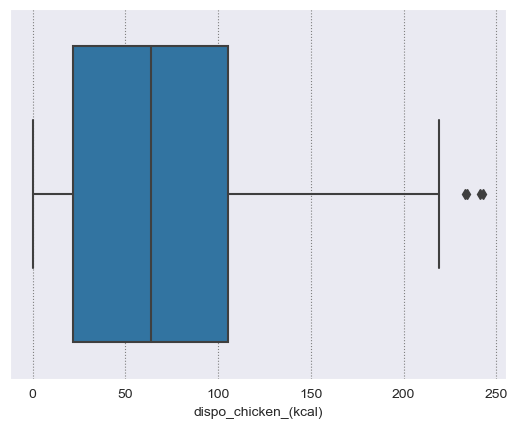

In [75]:
sns.boxplot(x = df_final['dispo_chicken_(kcal)'])

#### *2.4. Nettoyage final avant analyse*

In [160]:
df_final

,pays,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers)
0,Afghanistan,1.339313,5.0,0.54,29.0,28.0
1,Afrique du Sud,1.160628,143.0,14.11,514.0,1667.0
2,Albanie,0.950617,85.0,6.26,38.0,13.0
3,Algérie,1.211380,22.0,1.97,2.0,275.0
4,Allemagne,1.016986,71.0,7.96,842.0,1514.0
...,...,...,...,...,...,...
167,Émirats arabes unis,1.537924,147.0,14.80,433.0,48.0
168,Équateur,1.174084,83.0,6.15,0.0,340.0
169,États-Unis d'Amérique,1.081423,219.0,19.93,123.0,21914.0
170,Éthiopie,1.318882,0.0,0.04,1.0,14.0


# Df de test pour tester des trucs en avance

In [76]:
# Je met le df dans un df test pour tester des trucs
test = df_final.copy()
test

,pays,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers)
0,Afghanistan,1.339313,5.0,0.54,29.0,28.0
1,Afrique du Sud,1.160628,143.0,14.11,514.0,1667.0
2,Albanie,0.950617,85.0,6.26,38.0,13.0
3,Algérie,1.211380,22.0,1.97,2.0,275.0
4,Allemagne,1.016986,71.0,7.96,842.0,1514.0
...,...,...,...,...,...,...
167,Émirats arabes unis,1.537924,147.0,14.80,433.0,48.0
168,Équateur,1.174084,83.0,6.15,0.0,340.0
169,États-Unis d'Amérique,1.081423,219.0,19.93,123.0,21914.0
170,Éthiopie,1.318882,0.0,0.04,1.0,14.0


In [77]:
# Applique un background au df pour avoir un visu des valeurs
# test.style.background_gradient(cmap='OrRd')


In [78]:
# On regarde le df
test.describe()

,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers)
count,171.000000,172.000000,172.000000,170.000000,168.000000
mean,1.154803,74.558140,7.121279,89.529412,725.190476
std,0.147305,60.571277,5.603464,186.669983,2501.457125
min,0.873100,0.000000,0.040000,0.000000,0.000000
25%,1.048010,22.000000,2.165000,3.000000,13.750000
50%,1.128501,64.000000,6.505000,16.000000,70.000000
75%,1.248290,105.500000,10.365000,81.250000,409.750000
max,1.755984,243.000000,27.870000,1069.000000,21914.000000


In [79]:
test.isna().sum()

pays                             0
evo_pop_(%)                      1
dispo_chicken_(kcal)             0
dispo_chicken_prot_(g)           0
import_chicken_(milliers)        2
production_chicken_(milliers)    4
dtype: int64

In [80]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   pays                           172 non-null    object 
 1   evo_pop_(%)                    171 non-null    float64
 2   dispo_chicken_(kcal)           172 non-null    float64
 3   dispo_chicken_prot_(g)         172 non-null    float64
 4   import_chicken_(milliers)      170 non-null    float64
 5   production_chicken_(milliers)  168 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.2+ KB


### *4. Standardisation des données*

In [81]:
# Pour tester, on fait un fillna avant le scaling
# test = test.fillna(0)
test.isna().sum()

pays                             0
evo_pop_(%)                      1
dispo_chicken_(kcal)             0
dispo_chicken_prot_(g)           0
import_chicken_(milliers)        2
production_chicken_(milliers)    4
dtype: int64

In [82]:
# Scaling (StandardScaler()), transformation des données avecune moyenne = 0 et un ecart-type = 1

# Variables à normaliser et standardiser
categorial = ['pays']
# On enlève les colonnes qui n'ont pas besoin de traitement, il ne reste que les colonnes à traiter
variables_non_std = test.drop(categorial, axis=1)

# On récupère les valeurs que l'on veut traiter sous forme d'un array
X = variables_non_std.values

# On instancie notre scaler : 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# On peut faire les 2 opérations en une ligne
X_scaled = scaler.fit_transform(X)

# Réunion de toutes les variables standardisées
df_scaled = pd.merge(
    test.drop(variables_non_std.columns, axis=1), # On garde les variables n'ayant pas nécessité une standardisation
    pd.DataFrame(X_scaled, columns=variables_non_std.columns), # On ajoute les variables précédemment standardisées
    left_index=True, right_index=True)

df_scaled

,pays,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers)
0,Afghanistan,1.256255,-1.151721,-1.177931,-0.325217,-0.279547
1,Afrique du Sud,0.039661,1.133238,1.250856,2.280627,0.377630
2,Albanie,-1.390214,0.172893,-0.154154,-0.276861,-0.285561
3,Algérie,0.385211,-0.870241,-0.921987,-0.470284,-0.180509
4,Allemagne,-0.938334,-0.058915,0.150116,4.042929,0.316283
...,...,...,...,...,...,...
167,Émirats arabes unis,2.608507,1.199469,1.374354,1.845424,-0.271528
168,Équateur,0.131280,0.139778,-0.173842,-0.481030,-0.154447
169,États-Unis d'Amérique,-0.499613,2.391622,2.292532,0.179833,8.495910
170,Éthiopie,1.117144,-1.234510,-1.267422,-0.475657,-0.285160


In [83]:
# Comparaison entre l'index du df de base et celui du df après standardisation
# Pourquoi ce ne sont plus les mêmes alors que l'on pars du même df à la base ? Il se passe un truc lors de la fonction ?
test.index.tolist() == pd.DataFrame(X_scaled, columns=variables_non_std.columns).index.tolist()

True

In [84]:
test[test.isna().any(axis=1)]

,pays,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers)
43,Djibouti,1.172137,9.0,0.92,3.0,NaN
92,Maldives,1.481050,47.0,4.70,12.0,NaN
113,Ouzbékistan,1.174789,6.0,0.63,NaN,NaN
130,République démocratique populaire lao,1.169570,41.0,3.59,NaN,NaN
142,Soudan,NaN,5.0,0.54,2.0,67.0


In [85]:
df_scaled[df_scaled.isna().any(axis=1)]

,pays,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers)
43,Djibouti,0.118023,-1.085491,-1.109918,-0.464912,NaN
92,Maldives,2.221277,-0.456299,-0.433366,-0.416556,NaN
113,Ouzbékistan,0.136076,-1.135164,-1.161823,NaN,NaN
130,République démocratique populaire lao,0.100547,-0.555645,-0.632036,NaN,NaN
142,Soudan,NaN,-1.151721,-1.177931,-0.470284,-0.263909


In [86]:
# Est ce que l'on fait un fillna après le scale ou avant ?
# De toutes façon il faut traiter les manquants avant de faire une acp
df_scaled.fillna(0, inplace = True)

In [87]:
df_scaled[df_scaled.isna().any(axis=1)]

,pays,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers)


# Fin du df test

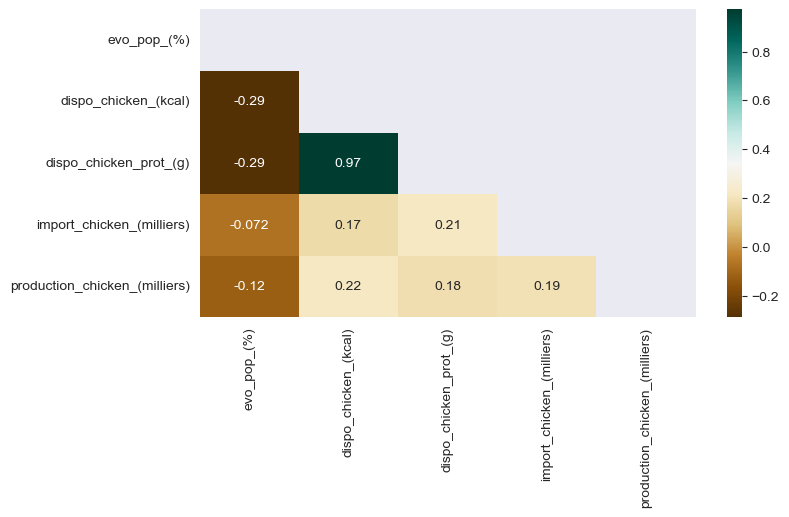

In [88]:
# Calculate pairwise-correlation : df scaler
matrix = df_scaled.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(8, 4))
sns.heatmap(matrix, mask=mask, annot=True, cmap='BrBG')
plt.show()

### *5. Analyse Composantes Principales - ACP*

In [89]:
# On commence par ne prendre que les colonnes que l'on souhaite (avec des valeurs, par de str), attention : il ne faut que des int ou float, pas de NaN ou autre
X = df_scaled.drop(['pays'], axis = 1)
X

,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers)
0,1.256255,-1.151721,-1.177931,-0.325217,-0.279547
1,0.039661,1.133238,1.250856,2.280627,0.377630
2,-1.390214,0.172893,-0.154154,-0.276861,-0.285561
3,0.385211,-0.870241,-0.921987,-0.470284,-0.180509
4,-0.938334,-0.058915,0.150116,4.042929,0.316283
...,...,...,...,...,...
167,2.608507,1.199469,1.374354,1.845424,-0.271528
168,0.131280,0.139778,-0.173842,-0.481030,-0.154447
169,-0.499613,2.391622,2.292532,0.179833,8.495910
170,1.117144,-1.234510,-1.267422,-0.475657,-0.285160


In [90]:
# Définition du nombre de composantes voulues
n_components = 4

In [91]:
pca = PCA(n_components=n_components)

In [92]:
# On entraine sur nos données standardisées
pca.fit(X)

PCA(n_components=4)

In [93]:
# Variance expliquée
pca.explained_variance_ratio_

array([0.45821348, 0.20544544, 0.17380224, 0.15742498])

In [94]:
# % de variance expliqué par composantes
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([45.82, 20.54, 17.38, 15.74])

In [95]:
# Somme cumulée des variances expliquées
scree_cum = scree.cumsum().round()
scree_cum

array([46., 66., 84., 99.])

In [96]:
print(len(scree_cum), 'composantes expliquent', scree_cum[-1], '% de la variance')

4 composantes expliquent 99.0 % de la variance


In [97]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4]

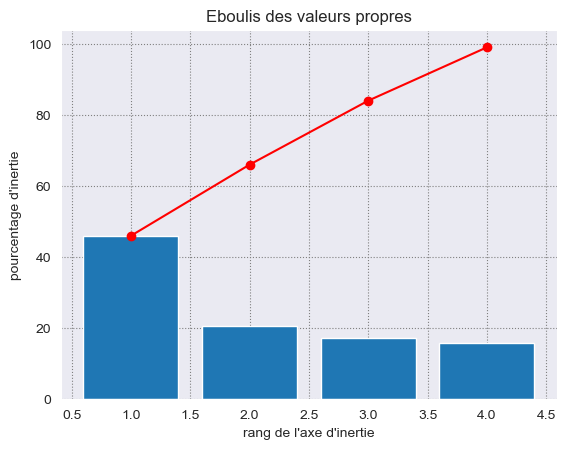

In [98]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [99]:
# Composantes par colonnes
pcs = pca.components_
pcs

array([[-0.31644181,  0.62275814,  0.62383542,  0.24086168,  0.25466037],
       [ 0.14920279, -0.22840024, -0.22043819,  0.70112671,  0.62080609],
       [ 0.85092134,  0.22104507,  0.24470979,  0.2525783 , -0.32154823],
       [ 0.3918126 ,  0.11769746,  0.04848705, -0.62057014,  0.66721204]])

In [100]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4
0,-0.316442,0.622758,0.623835,0.240862,0.254660
1,0.149203,-0.228400,-0.220438,0.701127,0.620806
2,0.850921,0.221045,0.244710,0.252578,-0.321548
3,0.391813,0.117697,0.048487,-0.620570,0.667212


In [101]:
features = X.columns
features

Index(['evo_pop_(%)', 'dispo_chicken_(kcal)', 'dispo_chicken_prot_(g)',
       'import_chicken_(milliers)', 'production_chicken_(milliers)'],
      dtype='object')

In [102]:
# On regarde les composantes par catégorie
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers)
F1,-0.32,0.62,0.62,0.24,0.25
F2,0.15,-0.23,-0.22,0.70,0.62
F3,0.85,0.22,0.24,0.25,-0.32
F4,0.39,0.12,0.05,-0.62,0.67


In [103]:
# df des composantes par catégories
pcs.T.round(2)

,F1,F2,F3,F4
evo_pop_(%),-0.32,0.15,0.85,0.39
dispo_chicken_(kcal),0.62,-0.23,0.22,0.12
dispo_chicken_prot_(g),0.62,-0.22,0.24,0.05
import_chicken_(milliers),0.24,0.70,0.25,-0.62
production_chicken_(milliers),0.25,0.62,-0.32,0.67


In [104]:
# Cercle de corrélations

In [105]:
# Fonction pour cercle de corrélation

In [106]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [107]:
x_y = (0, 1)
x_y

(0, 1)

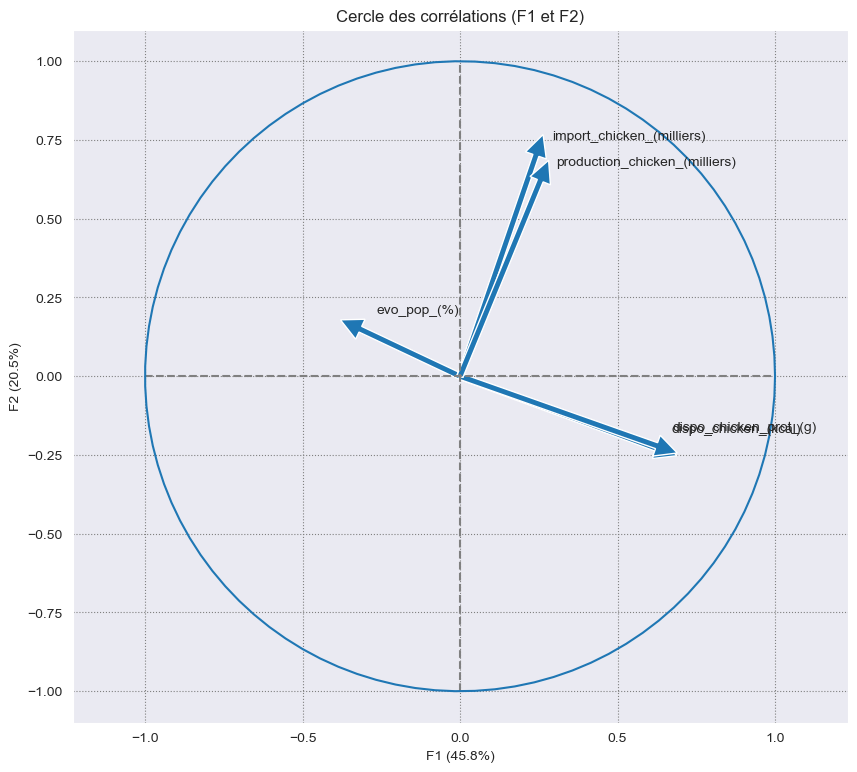

In [108]:
correlation_graph(pca, x_y, features)

### *Clustering sur ACP - SHC*

In [109]:
# On importe les lib nécessaires
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

In [110]:
# Calcul des coordonnées de projection par individus
X_proj = pca.transform(X)
X_proj[:5]

array([[-1.99913232,  0.30858844,  0.53388549,  0.31485013],
       [ 2.11899423,  1.30479252,  1.04495231, -0.95376044],
       [ 0.31201959, -0.58432421, -1.16057599, -0.55054714],
       [-1.39825658,  0.01768862, -0.15093818,  0.17520765],
       [ 1.40821786,  2.87131865,  0.14471937, -2.66520023]])

In [111]:
# On applique sur les coordonnées de nos individus suite à l'ACP
Z = linkage(X_proj, method="ward")
pd.DataFrame(Z)

,0,1,2,3
0,110.0,131.0,0.029586,2.0
1,28.0,89.0,0.036780,2.0
2,54.0,164.0,0.039369,2.0
3,91.0,147.0,0.049274,2.0
4,23.0,132.0,0.052962,2.0
...,...,...,...,...
166,324.0,336.0,10.079009,70.0
167,329.0,337.0,12.703307,90.0
168,331.0,334.0,15.633402,12.0
169,339.0,340.0,17.286384,102.0


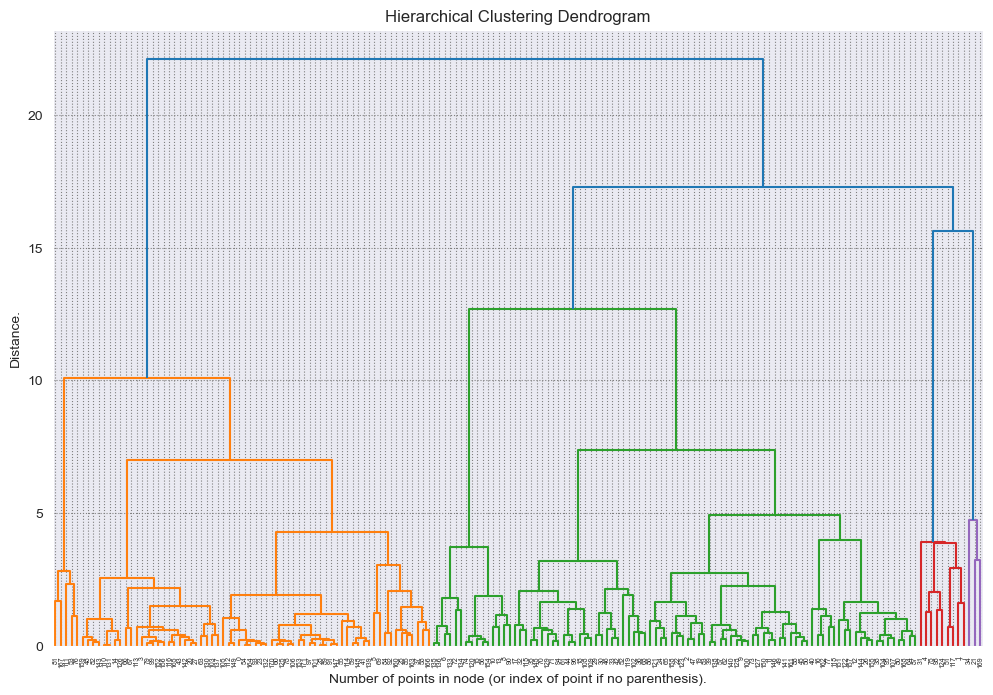

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

dendrogram(Z, ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

In [113]:
# On défini les paramètres du clustering
cah = AgglomerativeClustering(n_clusters=5, linkage='ward')

In [114]:
# Application sur les composantes par individus
cah.fit(X_proj)

AgglomerativeClustering(n_clusters=5)

In [115]:
# Visu des clustering effectués sur les composantes de l'ACP par individu
sch_cluster_acp = pd.DataFrame(cah.labels_)
sch_cluster_acp

,0
0,0
1,3
2,1
3,0
4,3
...,...
167,0
168,1
169,2
170,0


In [116]:
# Rajouter les valeurs de la PCA et df de base standardisé

In [117]:
# On met les composantes sous forme de df
# Coder pour que ça change le nom des colonnes quel que soit le nombre de composantes calculées
comp_pr = pd.DataFrame(X_proj)

# On renomme les CP automatiquement
col = list(comp_pr.columns)
col_rename = [f"F{i}" for i in x_list]
col_dict = dict(zip(col, col_rename)) # Mise des données sous  forme de dico
comp_pr.rename(columns = col_dict, inplace = True)

comp_pr

,F1,F2,F3,F4
0,-1.999132,0.308588,0.533885,0.314850
1,2.118994,1.304793,1.044952,-0.953760
2,0.312020,-0.584324,-1.160576,-0.550547
3,-1.398257,0.017689,-0.150938,0.175208
4,1.408218,2.871319,0.144719,-2.665200
...,...,...,...,...
167,1.154253,0.937588,3.374512,-0.096523
168,-0.218136,-0.407161,0.028229,0.254924
169,5.284549,4.274246,-2.021893,5.753866
170,-2.100162,0.217506,0.339121,0.335875


In [118]:
# df final avec les composantes principales ajoutées
df_with_pca = pd.merge(left = df_final, right = comp_pr, left_index = True, right_index = True).round(2)
df_with_pca

,pays,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers),F1,F2,F3,F4
0,Afghanistan,1.34,5.0,0.54,29.0,28.0,-2.00,0.31,0.53,0.31
1,Afrique du Sud,1.16,143.0,14.11,514.0,1667.0,2.12,1.30,1.04,-0.95
2,Albanie,0.95,85.0,6.26,38.0,13.0,0.31,-0.58,-1.16,-0.55
3,Algérie,1.21,22.0,1.97,2.0,275.0,-1.40,0.02,-0.15,0.18
4,Allemagne,1.02,71.0,7.96,842.0,1514.0,1.41,2.87,0.14,-2.67
...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,1.54,147.0,14.80,433.0,48.0,1.15,0.94,3.37,-0.10
168,Équateur,1.17,83.0,6.15,0.0,340.0,-0.22,-0.41,0.03,0.25
169,États-Unis d'Amérique,1.08,219.0,19.93,123.0,21914.0,5.28,4.27,-2.02,5.75
170,Éthiopie,1.32,0.0,0.04,1.0,14.0,-2.10,0.22,0.34,0.34


In [119]:
# Rajout des cluster au df
df_with_pca_cluster = pd.merge(left = df_with_pca, right = pd.DataFrame(cah.labels_).rename(columns = {0 : 'sch_cluster_pca'}), left_index = True, right_index = True)
df_with_pca_cluster

,pays,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers),F1,F2,F3,F4,sch_cluster_pca
0,Afghanistan,1.34,5.0,0.54,29.0,28.0,-2.00,0.31,0.53,0.31,0
1,Afrique du Sud,1.16,143.0,14.11,514.0,1667.0,2.12,1.30,1.04,-0.95,3
2,Albanie,0.95,85.0,6.26,38.0,13.0,0.31,-0.58,-1.16,-0.55,1
3,Algérie,1.21,22.0,1.97,2.0,275.0,-1.40,0.02,-0.15,0.18,0
4,Allemagne,1.02,71.0,7.96,842.0,1514.0,1.41,2.87,0.14,-2.67,3
...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,1.54,147.0,14.80,433.0,48.0,1.15,0.94,3.37,-0.10,0
168,Équateur,1.17,83.0,6.15,0.0,340.0,-0.22,-0.41,0.03,0.25,1
169,États-Unis d'Amérique,1.08,219.0,19.93,123.0,21914.0,5.28,4.27,-2.02,5.75,2
170,Éthiopie,1.32,0.0,0.04,1.0,14.0,-2.10,0.22,0.34,0.34,0


In [120]:
# Calculer les centroides de chaque cluster
# Il s'agit de la moyenne des composantes par cluster
# Donc groupby sur cluster et moyenne des composantes

In [121]:
centroides_pca = df_with_pca_cluster.groupby('sch_cluster_pca').mean()

centroides_pca

,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers),F1,F2,F3,F4
sch_cluster_pca,,,,,,,,,
0,1.277246,26.214286,2.627143,41.455882,176.363636,-1.374286,0.178286,0.328571,0.205143
1,1.064667,86.386667,8.345200,62.173333,478.613333,0.392667,-0.348800,-0.432000,-0.182667
2,1.076667,160.666667,13.190000,192.666667,18117.000000,3.643333,4.073333,-1.973333,4.320000
3,1.095556,116.333333,11.955556,768.777778,1549.888889,2.062222,2.354444,0.835556,-2.080000
4,1.094667,198.733333,17.860000,16.066667,399.733333,2.481333,-1.312000,0.517333,0.332667


### *Projection des individus par clusters fait sur l'ACP*

In [122]:
# Fonction pour projection des individus sur les axes

In [123]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire... Hahaha, oui, c'est tout a fait mon genre mdr
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='10', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    
    plt.show()

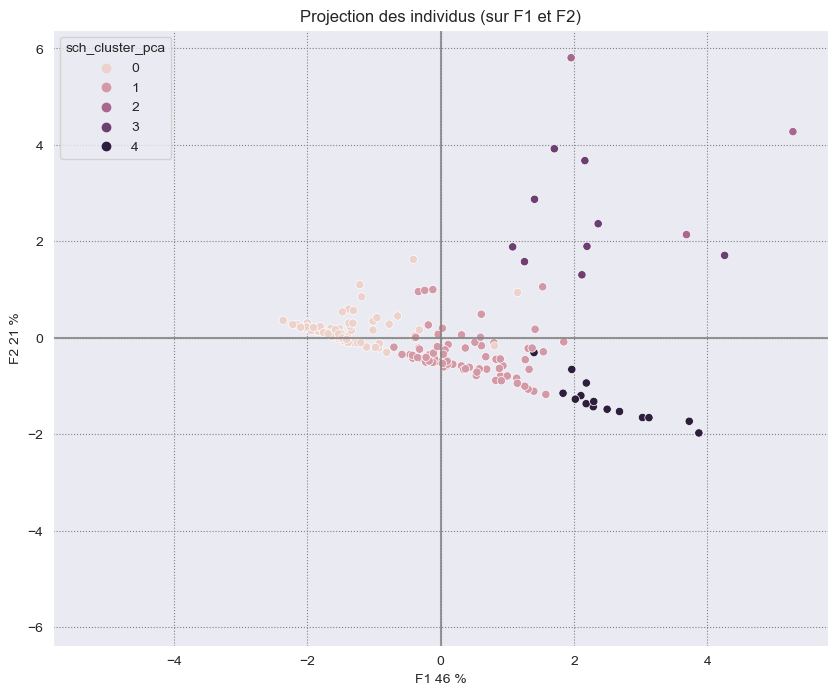

In [124]:
# On projete les individus sur F'x' et on les tri par les cluster que nous avons chercher sur les composantes
# On remarque que certains pays sont très éloignés...
# labels = df_with_pca_cluster['pays'] - Pour rajouter les labels
x_y = [0,1] # Choix des composantes de l'ACP à représenter dans le plan
display_factorial_planes(X_proj, x_y, clusters = df_with_pca_cluster['sch_cluster_pca'], pca = pca)

### *Clustering - SCH - df de base*

In [125]:
# On fait un SCH sur de df standardisé

In [126]:
df_scaled

,pays,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers)
0,Afghanistan,1.256255,-1.151721,-1.177931,-0.325217,-0.279547
1,Afrique du Sud,0.039661,1.133238,1.250856,2.280627,0.377630
2,Albanie,-1.390214,0.172893,-0.154154,-0.276861,-0.285561
3,Algérie,0.385211,-0.870241,-0.921987,-0.470284,-0.180509
4,Allemagne,-0.938334,-0.058915,0.150116,4.042929,0.316283
...,...,...,...,...,...,...
167,Émirats arabes unis,2.608507,1.199469,1.374354,1.845424,-0.271528
168,Équateur,0.131280,0.139778,-0.173842,-0.481030,-0.154447
169,États-Unis d'Amérique,-0.499613,2.391622,2.292532,0.179833,8.495910
170,Éthiopie,1.117144,-1.234510,-1.267422,-0.475657,-0.285160


In [127]:
# On applique sur les dfstandardisé
Z = linkage(df_scaled.drop(['pays'], axis = 1), method="ward",optimal_ordering = True)
pd.DataFrame(Z)

,0,1,2,3
0,54.0,164.0,0.039406,2.0
1,131.0,110.0,0.045484,2.0
2,91.0,147.0,0.049598,2.0
3,23.0,132.0,0.053294,2.0
4,89.0,28.0,0.060123,2.0
...,...,...,...,...
166,330.0,336.0,9.918294,75.0
167,337.0,334.0,12.301495,85.0
168,329.0,333.0,15.633429,12.0
169,339.0,340.0,17.451948,97.0


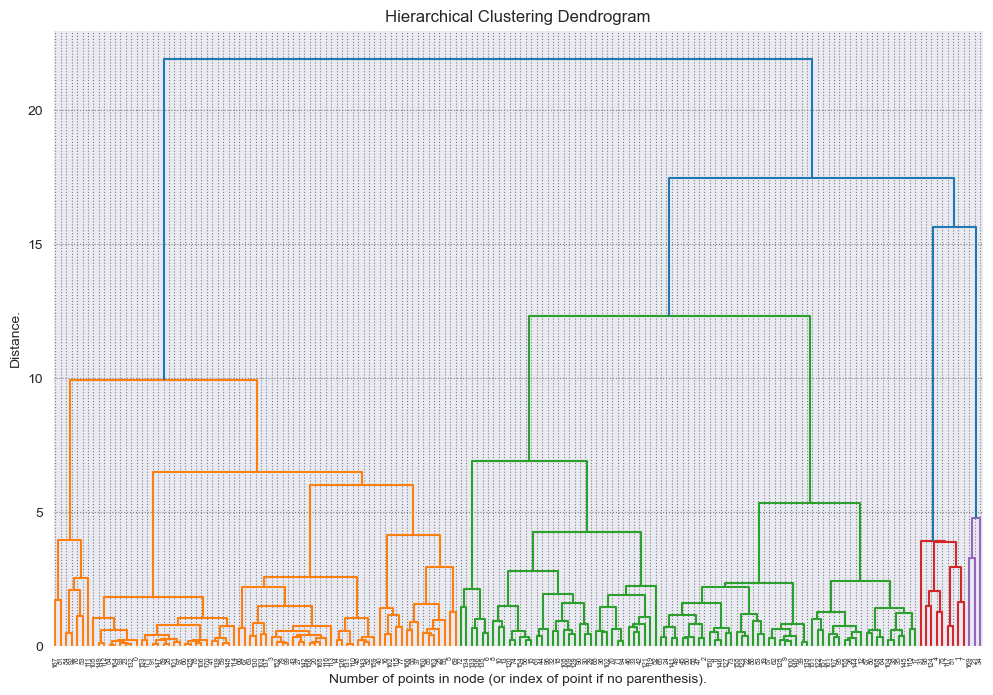

In [128]:
# On trace le dendrogramme
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

dendrogram(Z, ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

In [129]:
# On défini les paramètres du clustering
cah = AgglomerativeClustering(n_clusters=5, linkage="ward")

In [130]:
# Application sur les composantes par individus
cah.fit(df_scaled.drop(['pays'], axis = 1))

AgglomerativeClustering(n_clusters=5)

In [131]:
# Visu des clustering effectués sur le df scaled
sch_cluster = pd.DataFrame(cah.labels_).rename(columns = {0 : 'sch_cluster'})
sch_cluster

,sch_cluster
0,0
1,3
2,4
3,0
4,3
...,...
167,0
168,4
169,2
170,0


### *Clustering - KMEANS - df de base*

In [132]:
# On fait un kmeans sur de df standardisé
df_scaled

,pays,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers)
0,Afghanistan,1.256255,-1.151721,-1.177931,-0.325217,-0.279547
1,Afrique du Sud,0.039661,1.133238,1.250856,2.280627,0.377630
2,Albanie,-1.390214,0.172893,-0.154154,-0.276861,-0.285561
3,Algérie,0.385211,-0.870241,-0.921987,-0.470284,-0.180509
4,Allemagne,-0.938334,-0.058915,0.150116,4.042929,0.316283
...,...,...,...,...,...,...
167,Émirats arabes unis,2.608507,1.199469,1.374354,1.845424,-0.271528
168,Équateur,0.131280,0.139778,-0.173842,-0.481030,-0.154447
169,États-Unis d'Amérique,-0.499613,2.391622,2.292532,0.179833,8.495910
170,Éthiopie,1.117144,-1.234510,-1.267422,-0.475657,-0.285160


In [133]:
# On importe les lib nécessaires
from sklearn.cluster import KMeans

In [134]:
# Recherche pour trouver le nombre de cluster opti

In [135]:
intertia = []

In [136]:
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [137]:
# On entraine kmeans en boucle pour faire des cluster de 1 à x comme défini plus haut et récupérer l'inertie de chaque cluster
for i in k_list :
  kmeans = KMeans(n_clusters=i) # On entraine kmeans sur un nombre de cluster test
  kmeans.fit(df_scaled.drop(['pays'], axis = 1)) 
  intertia.append(kmeans.inertia_) # On ajoute l'inertie de chaque cluster dans une liste

C:\Users\david\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [138]:
intertia

[853.0,
 588.6909988440667,
 447.43685009655684,
 328.2497941603349,
 237.29833079310302,
 196.17512947755952,
 169.19287301259587,
 149.86371382351888,
 134.33162036217865]

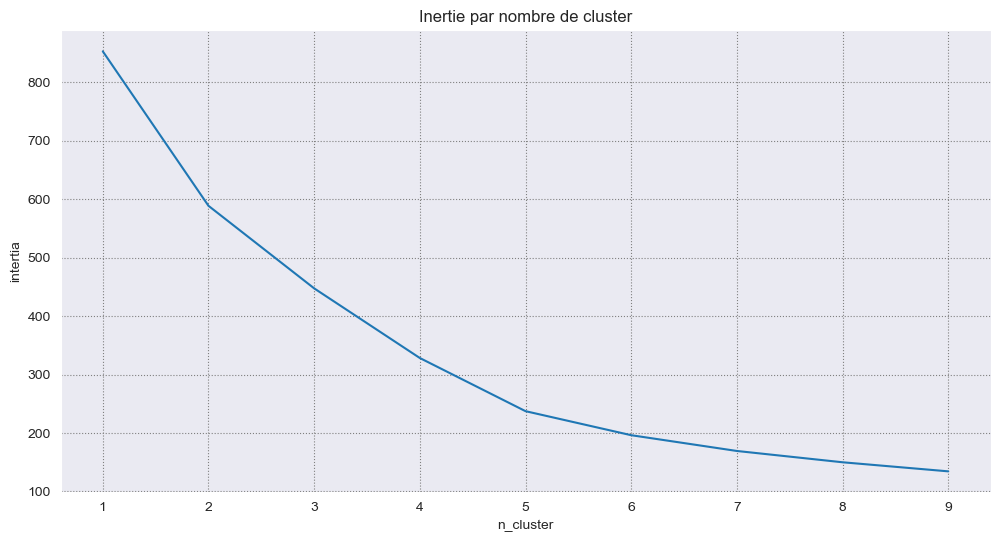

In [139]:
# On trace l'inertie par cluster (méthode du coude)
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

plt.title('Inertie par nombre de cluster')
plt.show()

In [140]:
# D'après le graph, on choisi 5 cluster voir 6
# Toutefois ce n'est pas asser marqué, revoir les données d'entrées ?
kmeans = KMeans(n_clusters=5)
# On entraine kmeans
kmeans.fit(df_scaled.drop(['pays'], axis = 1))

KMeans(n_clusters=5)

In [141]:
# On récupère les clusters donnés par kmeans
kmean_cluster = pd.DataFrame(kmeans.labels_).rename(columns = {0 : 'kmean_cluster'})
kmean_cluster

,kmean_cluster
0,0
1,2
2,1
3,0
4,2
...,...
167,2
168,1
169,4
170,0


In [142]:
# Centroides des cluster
kmeans.cluster_centers_

array([[ 0.81899847, -0.86183455, -0.87057758, -0.31975648, -0.20371108],
       [-0.67607657,  0.02509134,  0.08002348, -0.14182806, -0.09527539],
       [ 0.02533548,  0.64102368,  0.80437696,  3.33957133,  0.22293147],
       [-0.23785126,  1.7193801 ,  1.56156887, -0.31876943, -0.14610678],
       [-0.53136757,  1.42575728,  1.08619241,  0.55414343,  6.97345676]])

In [143]:
# Features du kmeans
kmeans.feature_names_in_

array(['evo_pop_(%)', 'dispo_chicken_(kcal)', 'dispo_chicken_prot_(g)',
       'import_chicken_(milliers)', 'production_chicken_(milliers)'],
      dtype=object)

In [144]:
# Nombre d'itération
kmeans.n_iter_

5

In [145]:
# On ajoute les cluster kmeans au df
df_scaled_kmeans = X.copy()
df_scaled_kmeans["cluster"] = kmeans.labels_
df_scaled_kmeans

,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers),cluster
0,1.256255,-1.151721,-1.177931,-0.325217,-0.279547,0
1,0.039661,1.133238,1.250856,2.280627,0.377630,2
2,-1.390214,0.172893,-0.154154,-0.276861,-0.285561,1
3,0.385211,-0.870241,-0.921987,-0.470284,-0.180509,0
4,-0.938334,-0.058915,0.150116,4.042929,0.316283,2
...,...,...,...,...,...,...
167,2.608507,1.199469,1.374354,1.845424,-0.271528,2
168,0.131280,0.139778,-0.173842,-0.481030,-0.154447,1
169,-0.499613,2.391622,2.292532,0.179833,8.495910,4
170,1.117144,-1.234510,-1.267422,-0.475657,-0.285160,0


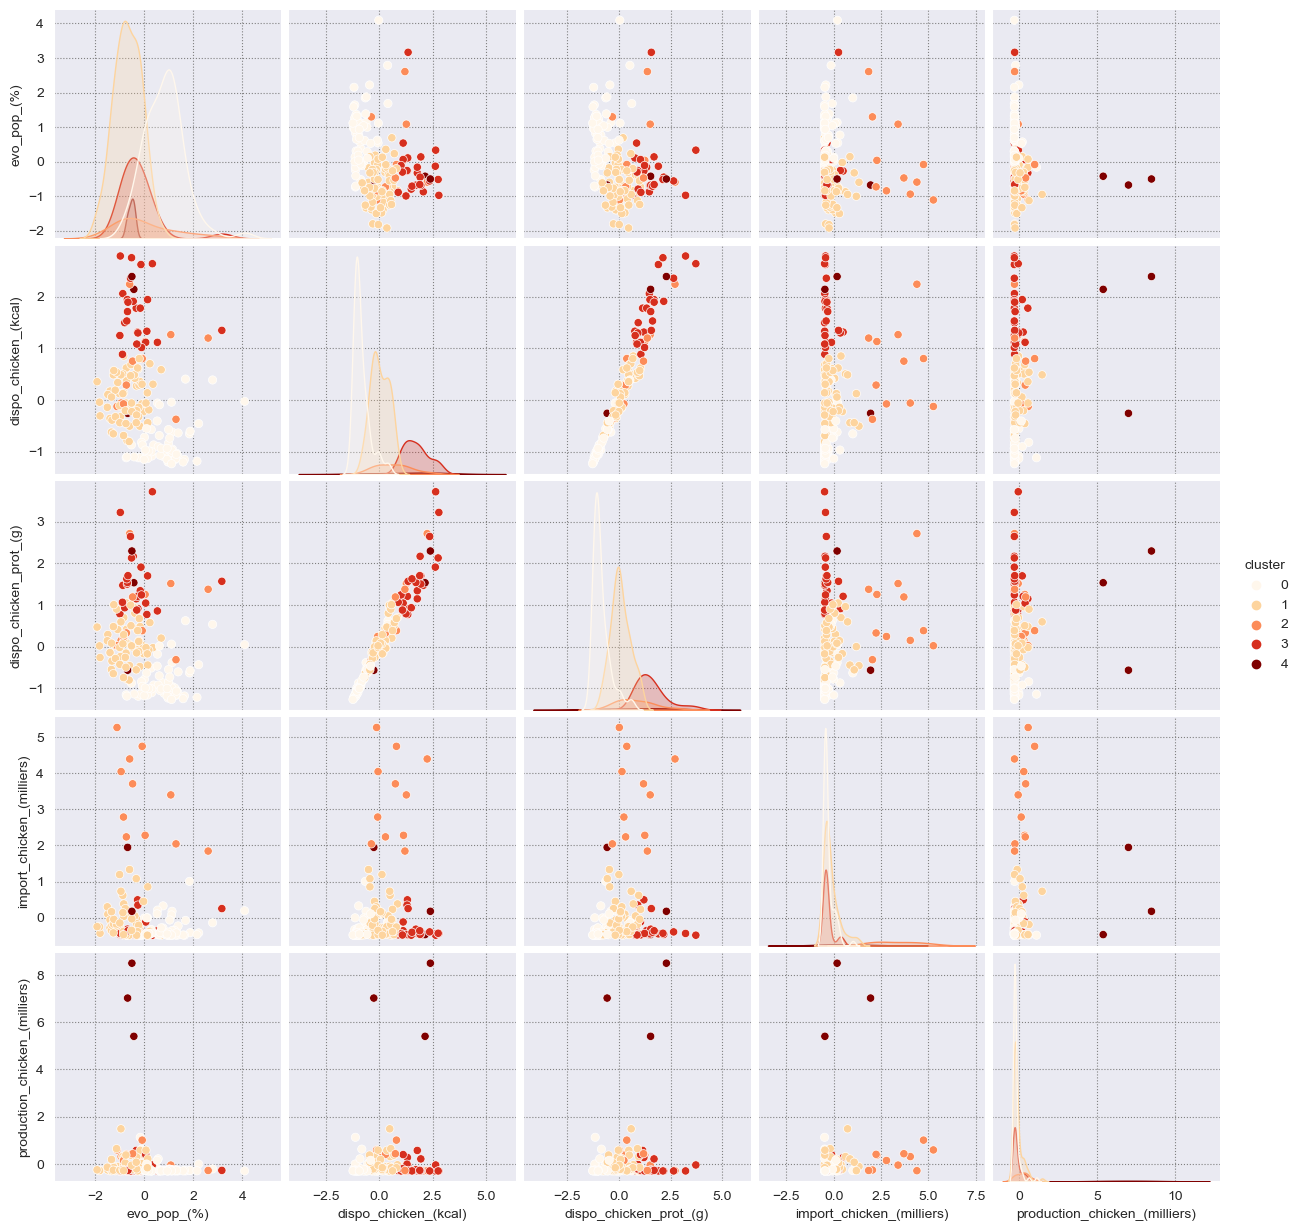

In [146]:
sns.pairplot(df_scaled_kmeans, hue="cluster", palette = 'OrRd')

In [147]:
# On voit qu'il y a un cluster qui sort clairement du lot

In [148]:
# On compare les deux clustering
comp_cluster = pd.merge(sch_cluster, kmean_cluster, left_index = True, right_index = True)
comp_cluster

,sch_cluster,kmean_cluster
0,0,0
1,3,2
2,4,1
3,0,0
4,3,2
...,...,...
167,0,2
168,4,1
169,2,4
170,0,0


In [149]:
# On compare les trois type de clustering que nous avons fait
comp_cluster = pd.merge(comp_cluster, sch_cluster_acp, left_index = True, right_index = True)
comp_cluster.rename(columns = {0: 'sch_cluster_pca'}, inplace = True)
comp_cluster

,sch_cluster,kmean_cluster,sch_cluster_pca
0,0,0,0
1,3,2,3
2,4,1,1
3,0,0,0
4,3,2,3
...,...,...,...
167,0,2,0
168,4,1,1
169,2,4,2
170,0,0,0


In [150]:
comp_cluster.describe()

,sch_cluster,kmean_cluster,sch_cluster_pca
count,172.000000,172.000000,172.000000
mean,1.523256,1.029070,0.976744
std,1.708094,1.089167,1.194302
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,4.000000,1.000000,1.000000
max,4.000000,4.000000,4.000000


# **TEST DIVERS**

In [151]:
df_final.drop('pays', axis = 1)

,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers)
0,1.339313,5.0,0.54,29.0,28.0
1,1.160628,143.0,14.11,514.0,1667.0
2,0.950617,85.0,6.26,38.0,13.0
3,1.211380,22.0,1.97,2.0,275.0
4,1.016986,71.0,7.96,842.0,1514.0
...,...,...,...,...,...
167,1.537924,147.0,14.80,433.0,48.0
168,1.174084,83.0,6.15,0.0,340.0
169,1.081423,219.0,19.93,123.0,21914.0
170,1.318882,0.0,0.04,1.0,14.0


In [152]:
df_final.loc[df_final['production_chicken_(milliers)'].isna()]

,pays,evo_pop_(%),dispo_chicken_(kcal),dispo_chicken_prot_(g),import_chicken_(milliers),production_chicken_(milliers)
43,Djibouti,1.172137,9.0,0.92,3.0,NaN
92,Maldives,1.481050,47.0,4.70,12.0,NaN
113,Ouzbékistan,1.174789,6.0,0.63,NaN,NaN
130,République démocratique populaire lao,1.169570,41.0,3.59,NaN,NaN


In [153]:
# Imputation par knn

In [154]:
from sklearn.impute import KNNImputer
# imputation sur la base des x plus proches voisins sans données manquantes
#  obtenus à partir de distances calculées avec les seules données présentes
data_imputed = KNNImputer(missing_values=np.nan, n_neighbors=20, weights = 'distance').fit_transform(df_final.drop('pays', axis = 1))

# évaluation des résultats
# mean_squared_error(data[missing_samples,1],data_imputed[missing_samples,1])

In [155]:
a = pd.DataFrame(data_imputed)
a

,0,1,2,3,4
0,1.339313,5.0,0.54,29.0,28.0
1,1.160628,143.0,14.11,514.0,1667.0
2,0.950617,85.0,6.26,38.0,13.0
3,1.211380,22.0,1.97,2.0,275.0
4,1.016986,71.0,7.96,842.0,1514.0
...,...,...,...,...,...
167,1.537924,147.0,14.80,433.0,48.0
168,1.174084,83.0,6.15,0.0,340.0
169,1.081423,219.0,19.93,123.0,21914.0
170,1.318882,0.0,0.04,1.0,14.0


In [156]:
a.columns = df_final.drop('pays', axis = 1).columns

In [157]:
b = pd.merge(a, df_final, left_index = True, right_index = True)
b

,evo_pop_(%)_x,dispo_chicken_(kcal)_x,dispo_chicken_prot_(g)_x,import_chicken_(milliers)_x,production_chicken_(milliers)_x,pays,evo_pop_(%)_y,dispo_chicken_(kcal)_y,dispo_chicken_prot_(g)_y,import_chicken_(milliers)_y,production_chicken_(milliers)_y
0,1.339313,5.0,0.54,29.0,28.0,Afghanistan,1.339313,5.0,0.54,29.0,28.0
1,1.160628,143.0,14.11,514.0,1667.0,Afrique du Sud,1.160628,143.0,14.11,514.0,1667.0
2,0.950617,85.0,6.26,38.0,13.0,Albanie,0.950617,85.0,6.26,38.0,13.0
3,1.211380,22.0,1.97,2.0,275.0,Algérie,1.211380,22.0,1.97,2.0,275.0
4,1.016986,71.0,7.96,842.0,1514.0,Allemagne,1.016986,71.0,7.96,842.0,1514.0
...,...,...,...,...,...,...,...,...,...,...,...
167,1.537924,147.0,14.80,433.0,48.0,Émirats arabes unis,1.537924,147.0,14.80,433.0,48.0
168,1.174084,83.0,6.15,0.0,340.0,Équateur,1.174084,83.0,6.15,0.0,340.0
169,1.081423,219.0,19.93,123.0,21914.0,États-Unis d'Amérique,1.081423,219.0,19.93,123.0,21914.0
170,1.318882,0.0,0.04,1.0,14.0,Éthiopie,1.318882,0.0,0.04,1.0,14.0


In [158]:
b.loc[b['pays'] == 'République démocratique populaire lao']

,evo_pop_(%)_x,dispo_chicken_(kcal)_x,dispo_chicken_prot_(g)_x,import_chicken_(milliers)_x,production_chicken_(milliers)_x,pays,evo_pop_(%)_y,dispo_chicken_(kcal)_y,dispo_chicken_prot_(g)_y,import_chicken_(milliers)_y,production_chicken_(milliers)_y
130,1.16957,41.0,3.59,70.53851,201.305402,République démocratique populaire lao,1.16957,41.0,3.59,NaN,NaN


In [159]:
b.loc[b['pays'] == 'Ouzbékistan']

,evo_pop_(%)_x,dispo_chicken_(kcal)_x,dispo_chicken_prot_(g)_x,import_chicken_(milliers)_x,production_chicken_(milliers)_x,pays,evo_pop_(%)_y,dispo_chicken_(kcal)_y,dispo_chicken_prot_(g)_y,import_chicken_(milliers)_y,production_chicken_(milliers)_y
113,1.174789,6.0,0.63,3.237526,271.032295,Ouzbékistan,1.174789,6.0,0.63,NaN,NaN
